<a href="https://colab.research.google.com/github/SeungYeon2000/pytorch/blob/main/CycleGAN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

CycleGAN : 사진으로 구성된 두 가지 데이터셋 중 한 데이터셋의 사진들을 다른 스타일의 데이터셋으로 바꿔주는 일 (화풍,초점변경-아웃포커싱,필터) like prisma

# Pix2pix
한 픽셀을 다른 픽셀로 바꿔줌.

train을 통해 self-supervised.

loss : 결과인 G(x)와 데이터 원본인 y간의 차이를 최소화함. label을 가지고 중간값을 선정.(뿌옇게 보일 수 있음)

흑백<->컬러 뿐만 아니라, 픽셀마다 label 정의 내려서 사진처럼 보이게 할 수도 있음.


# GAN
사람 대신 D라는 네트워크가 supervised됨.

G : D를 속이는 이미지 합성 담당 (픽셀 레벨에서)

D : 거짓을 구별해 냄

G와 D라는 두 네트워크의 경쟁을 통해 성장할 수 있음.

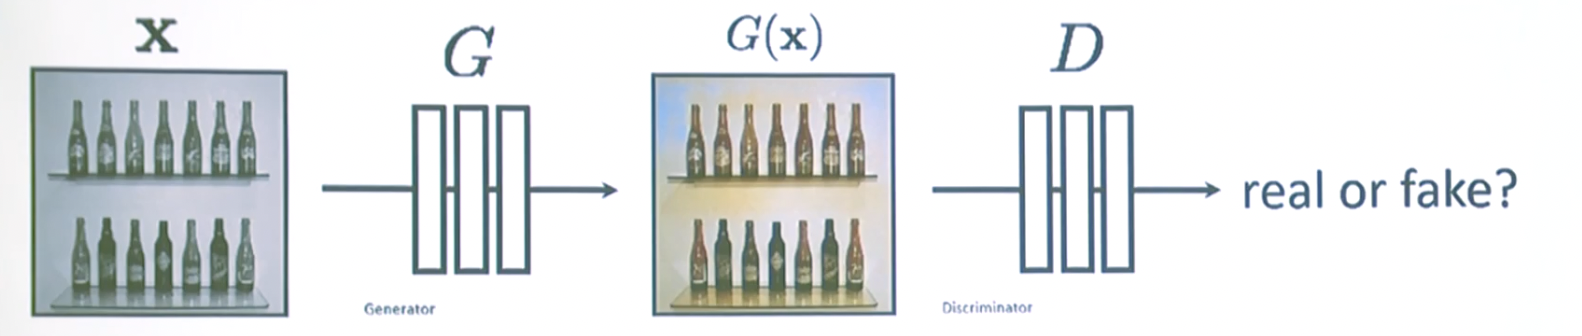

# CycleGAN 
복구 가능한 정도로만 바꾸는 네트워크, G(x)에서의 값으로 다시 x를 만들 수 있도록 하는 네트워크

bottleneck이 가시적인 사진인 autoencoder(입출력 동일한 구조인 신경망)인 것이 장점.

사진->그림->사진 이 가능하도록.

F(G(x)) = x, F가 역 deep network임. (역도 성립)

다만 여러 번 돌렸을 때는 유의미한 결과 X. 

G & F 까지만.

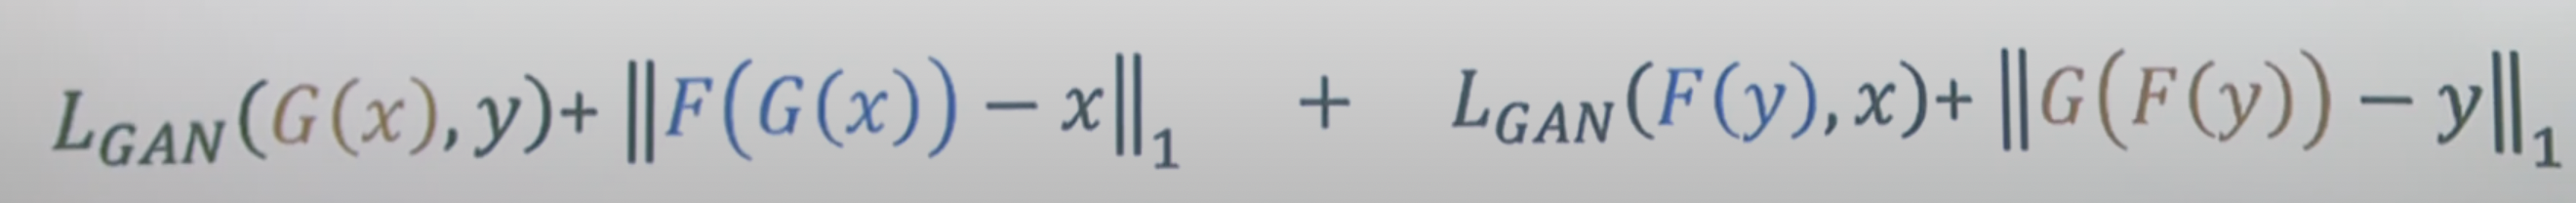

# 사용된 아키텍처
이미지를 다른 이미지로 바꿀 때, G의 아키텍쳐가 중요. -> encoder-decoder 사용 X

UNET 이 아닌 RESNET 사용, depth는 있으면서 bottleneck이 없어(메모리는 많이 사용) 디테일 간직 가능, 변수가 적어져서 많은 형태 변화는 불가능.


# 수학적 공식에서는?
일반 GAN 공식을 사용하면 0 이상의 부분에서 평평한 부분(vanishing gradient)이 생겨서 LSGAN이라는 least square gan을 사용함. 진짜 이미지에서는 D함수가 1에 가깝게, 가짜에서는 0에 가까운 점수를 할당해야. -> vanishing gradient 발생 X

# 안정적인 결과를 위한 한 가지 팁
L1 loss를 stable guiding force로서 GAN 훈련에 넣어주면 좋음. 말->얼룩말 변환해야 할 때 얼룩말 사진을 인풋으로 넣어도 얼룩말->얼룩말 이도록. 

# CycleGAN의 한계점과 해결방안
Discriminator가 epoch에 따라 항상 일정한 예측값을 내놓지 못하는 단점 발생

- D 함수를 늘리고 평균치 계산하기 (복잡, 오래 걸림 :(  )
- replay buffer : 이전에 G가 만들어놓은 사진들을 D에 주기적으로 보여줌, D가 누적된 G의 양상을 대응하기 때문에 훨씬 안정적. G는 학습하지 않고 D만 학습하게 되는 과정.